<a href="https://colab.research.google.com/github/saad-mhmd/Web_Scraping_NBA/blob/main/AdnaneMARBOUH_MohammadSAAD_ObedKANI_MichaelAGYEI_KANE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Scripting Project - NBA stats

by: **Adnane MARBOUH, Mohammad SAAD,  Obed KANI, Michael AGYEI-KANE**

### The first thing to do is to acquire data to be analyzed. Nba.come/stats has been chosen as the website to get the data from.

In order to do that, we have learned that we can either scrap the data directly from the source code using BS4, OR (if possible) we can get the data from an API belonging to the website.

 <font color='Orange'> 📚 In this project, we're gonna go with the latter as the website provide an API that everyone can use:  </font>  

In [32]:
import pandas as pd
import requests
pd.set_option('display.max_columns', None) # so we can see all columns in a wide DataFrame
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

By utilizing the NETWORK tab in the developer tools of Chrome, we can find the request we can utilize to get the data:

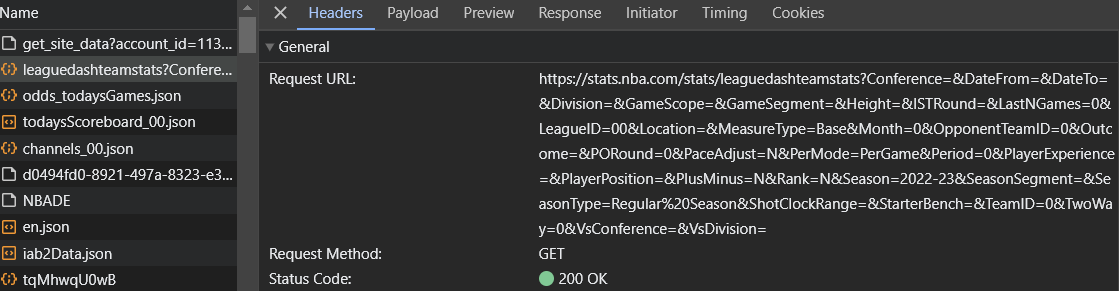


The request URL acts as an API and by modifying the endpoints, we can obtain

1.   List item
2.   List item

the data we want.

In [33]:
##Player stats for 2022-23 season:
raw_api_url = 'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season=2022-23&SeasonType=Regular%20Season&StatCategory=PTS'
##Team stats for 2022-23 season:
raw_api_team = 'https://stats.nba.com/stats/leaguedashteamstats?Conference=&DateFrom=&DateTo=&Division=&GameScope=&GameSegment=&Height=&ISTRound=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2022-23&SeasonSegment=&SeasonType=Regular%20Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision='
path1 = r'NBA_players.xlsx'
path2 = r'NBA_team.xlsx'

headers = {
    'Accept': '*/*',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9,es;q=0.8',
    'Connection': 'keep-alive',
    'Host': 'stats.nba.com',
    'If-Modified-Since': 'Thu, 20 Oct 2022 08:06:46 GMT',
    'Origin': 'https://www.nba.com',
    'Referer': 'https://www.nba.com/',
    'sec-ch-ua': '"Chromium";v="106", "Google Chrome";v="106", "Not;A=Brand";v="99"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': "Windows",
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-site',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'
}

r = requests.get(url=raw_api_url, headers=headers).json()
r2 = requests.get(url=raw_api_team, headers=headers).json()

##Extracting the players data first
df_cols = r['resultSet']['headers']
df = pd.DataFrame(columns=df_cols)

r = requests.get(url=raw_api_url, headers=headers).json()
df_rows = r['resultSet']['rowSet']
temp_df1 = pd.DataFrame(df_rows, columns=df_cols)
df = pd.concat([df, temp_df1], axis=0)

df.to_excel(path1, index=False)

##Extracting the teams data
r_team = requests.get(url=raw_api_team, headers=headers).json()

df_cols2 = r_team['resultSets'][0]['headers']
df2 = pd.DataFrame(columns=df_cols2)

r2 = requests.get(url=raw_api_team, headers=headers).json()
df_rows2 = r_team['resultSets'][0]['rowSet']
temp_df2 = pd.DataFrame(df_rows2, columns=df_cols2)
df2 = pd.concat([df2, temp_df2], axis=0)

df2.to_excel(path2, index=False)

In [34]:
print(df.head())
df_copy = df.copy()

  PLAYER_ID RANK                   PLAYER     TEAM_ID TEAM  GP   MIN   FGM  \
0    203954    1              Joel Embiid  1610612755  PHI  66  34.6  11.0   
1   1629029    2              Luka Doncic  1610612742  DAL  66  36.2  10.9   
2    203081    3           Damian Lillard  1610612757  POR  58  36.3   9.6   
3   1628983    4  Shai Gilgeous-Alexander  1610612760  OKC  68  35.5  10.4   
4    203507    5    Giannis Antetokounmpo  1610612749  MIL  63  32.1  11.2   

    FGA  FG_PCT  FG3M  FG3A  FG3_PCT   FTM   FTA  FT_PCT  OREB  DREB   REB  \
0  20.1   0.548   1.0   3.0    0.330  10.0  11.7   0.857   1.7   8.4  10.2   
1  22.0   0.496   2.8   8.2    0.342   7.8  10.5   0.742   0.8   7.8   8.6   
2  20.7   0.463   4.2  11.3    0.371   8.8   9.6   0.914   0.8   4.0   4.8   
3  20.3   0.510   0.9   2.5    0.345   9.8  10.9   0.905   0.9   4.0   4.8   
4  20.3   0.553   0.7   2.7    0.275   7.9  12.3   0.645   2.2   9.6  11.8   

   AST  STL  BLK  TOV   PTS   EFF  
0  4.2  1.0  1.7  3.4  33.

In [35]:
print(df2.head())
df2_copy = df2.copy()

      TEAM_ID          TEAM_NAME  GP   W   L  W_PCT   MIN   FGM   FGA  FG_PCT  \
0  1610612737      Atlanta Hawks  82  41  41  0.500  48.4  44.6  92.4   0.483   
1  1610612738     Boston Celtics  82  57  25  0.695  48.7  42.2  88.8   0.475   
2  1610612751      Brooklyn Nets  82  45  37  0.549  48.1  41.5  85.1   0.487   
3  1610612766  Charlotte Hornets  82  27  55  0.329  48.4  41.3  90.4   0.457   
4  1610612741      Chicago Bulls  82  40  42  0.488  48.5  42.5  86.8   0.490   

   FG3M  FG3A  FG3_PCT   FTM   FTA  FT_PCT  OREB  DREB   REB   AST   TOV  STL  \
0  10.8  30.5    0.352  18.5  22.6   0.818  11.2  33.2  44.4  25.0  12.9  7.1   
1  16.0  42.6    0.377  17.5  21.6   0.812   9.7  35.6  45.3  26.7  13.4  6.4   
2  12.8  33.8    0.378  17.7  22.1   0.800   8.2  32.3  40.5  25.5  13.7  7.1   
3  10.7  32.5    0.330  17.6  23.6   0.749  11.0  33.5  44.5  25.1  14.2  7.7   
4  10.4  28.9    0.361  17.6  21.8   0.809   8.5  33.9  42.4  24.5  13.4  7.9   

   BLK  BLKA    PF   PFD  

### <font color='Orange'> TEAM STATS </font>

For the first part, we're gonna focus on the stats regarding the individual teams.

<font color='Green'>📚 First plot is a plot that takes the top 100 players, and classifies them according to which team they belong.

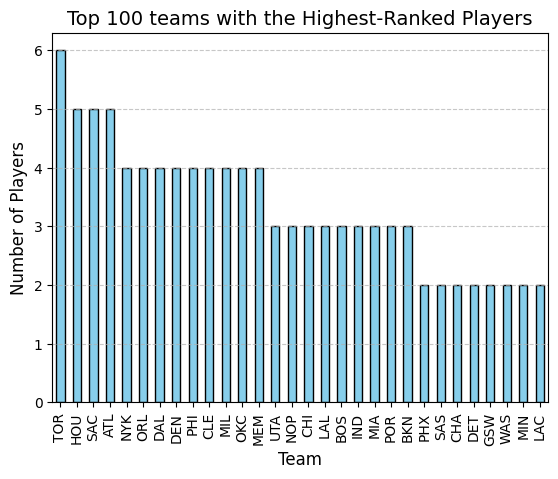

In [5]:
##Teams with the top 100 players
top_100 = df[df['RANK']<=100]['TEAM'].value_counts()
ax = top_100.plot(kind='bar', color='skyblue', edgecolor='black')
ax.set_xlabel('Team', fontsize=12)
ax.set_ylabel('Number of Players', fontsize=12)
ax.set_title('Top 100 teams with the Highest-Ranked Players', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The plot shows that Toronto Raptors (TOR) team has the maximum of top players, followed by Houston Rockets (HOU), Sacramento Kings (SAC) and Atlanta Hawks (ATL).

<font color='Green'>📚 Second plot will be a bar chart for the Win-Loss ration of the teams.

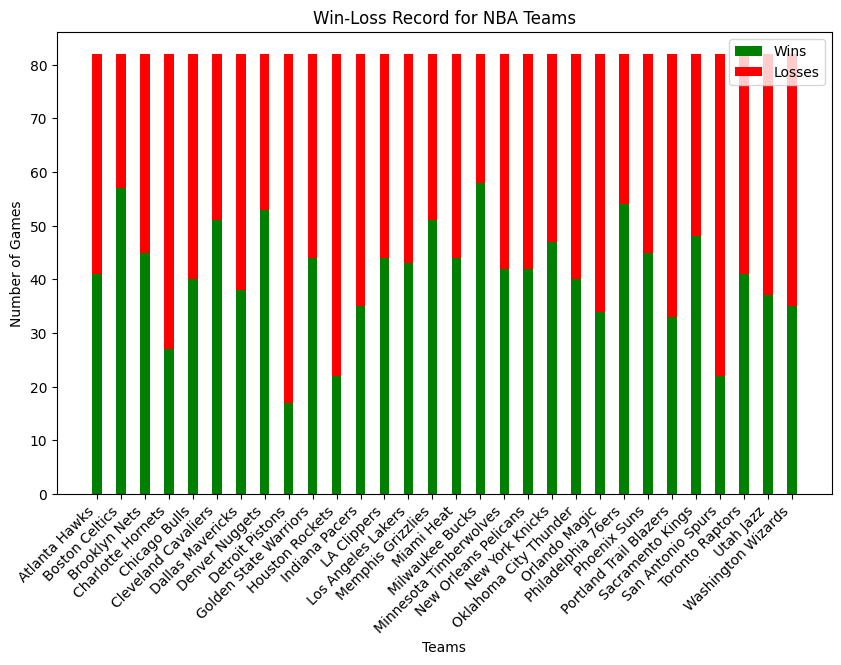

In [36]:
teams = df2['TEAM_NAME']
wins = df2['W']
losses = df2['L']

plt.figure(figsize=(10, 6))
bar_width = 0.4

plt.bar(teams, wins, width=bar_width, label='Wins', color='green')
plt.bar(teams, losses, width=bar_width, label='Losses', color='red', bottom=wins,)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Teams')
plt.ylabel('Number of Games')
plt.title('Win-Loss Record for NBA Teams')
plt.legend()



According to the chart, **Milwaukee Bucks** have the highest win-lose ration, followed by **Boston Celtics** and **Philadelphia 76ers**.

<font color='Green'> 📚 Scatter Plot for Shooting Percentage: </font>

We're gonna compare field goal percentage (FG_PCT) and three-point percentage (FG3_PCT) for each team.

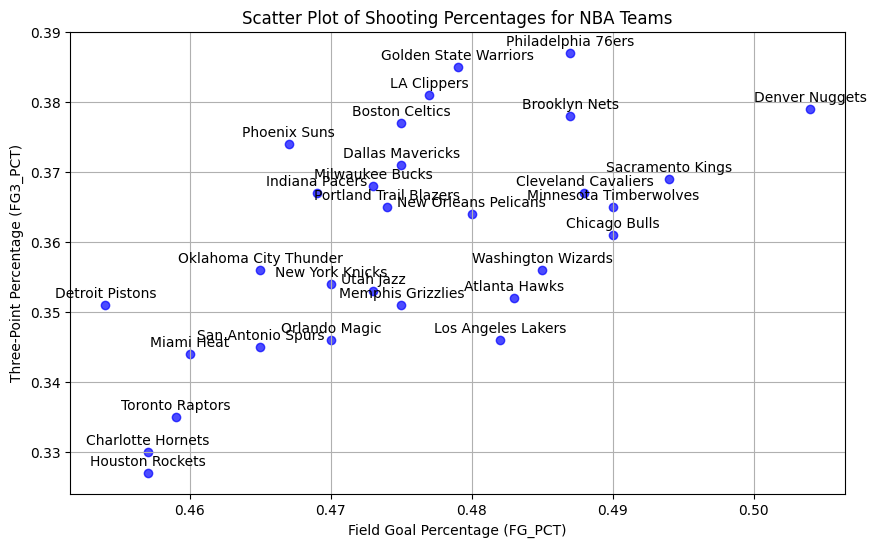

In [7]:
teams = df2['TEAM_NAME']
fg_pct = df2['FG_PCT']
fg3_pct = df2['FG3_PCT']


plt.figure(figsize=(10, 6))
plt.scatter(fg_pct, fg3_pct, color='blue', alpha=0.7)


plt.xlabel('Field Goal Percentage (FG_PCT)')
plt.ylabel('Three-Point Percentage (FG3_PCT)')
plt.title('Scatter Plot of Shooting Percentages for NBA Teams')
plt.grid(True)
for i, team in enumerate(teams):
    plt.annotate(team, (fg_pct[i], fg3_pct[i]), textcoords="offset points", xytext=(0, 5), ha='center')

According to the plot, we notice that Denver Nuggets have the highest point FG percentage (>0.5), which means more than half of their shots are goals, and more than a THIRD of their goals are THREE POINTERS.

<font color='Green'> 📚 Box Plot for Key Metrics </font>

We're gonna visualize the distribution of key metrics like points (PTS), rebounds (REB), assists (AST), and steals (STL) across ***all teams***.

Text(0.5, 1.0, 'Box Plot of Key Metrics for NBA Teams')

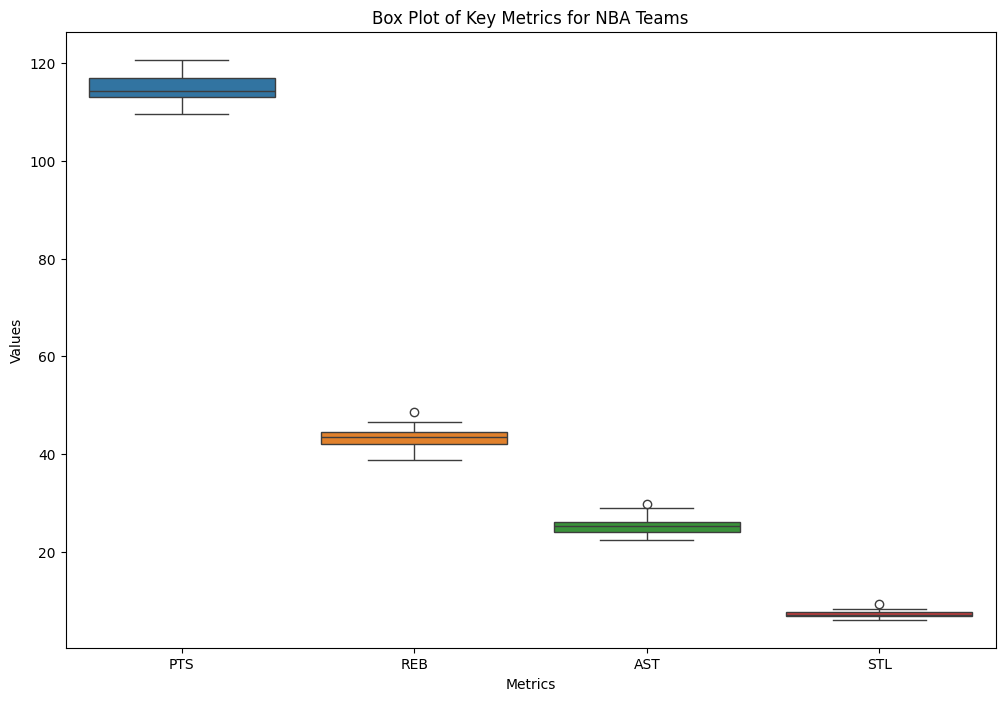

In [30]:
Unimetrics_df = df2[['PTS', 'REB', 'AST', 'STL']]

plt.figure(figsize=(12, 8))
sns.boxplot(data=Unimetrics_df)

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Box Plot of Key Metrics for NBA Teams')

We see that POINTS takes the lead, as it has the highest values, while the last is the STEALS.

We can conclude that in NBA games, points is what happens in the majority of the game while there's occasional plays of rebounds and assists. While steals remain the not so often seen plays done by players.

### <font color='Orange'> PLAYER STATS </font>

This second part, we're gonna focus on the individual player stats.

<font color='Green'>📚 Bar Chart for Points per Game (PTS) for Top Scorers:</font>

Text(0.5, 1.0, 'Top Scorers in Points per Game')

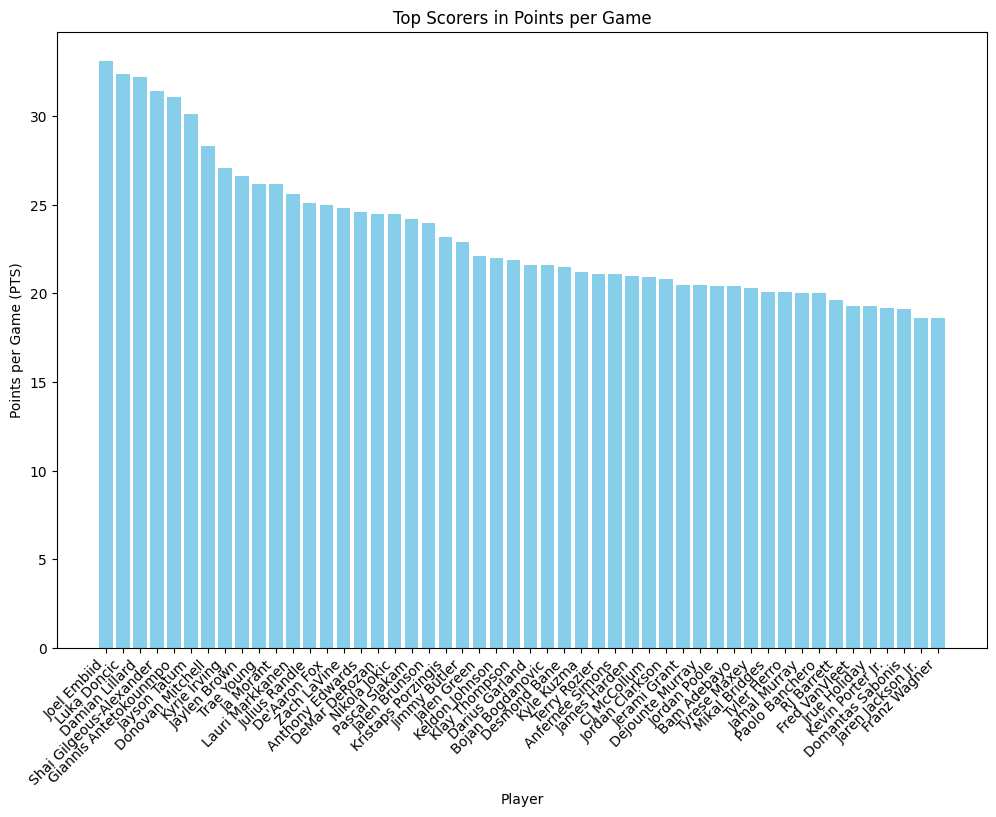

In [9]:
players = df[df['RANK']<=50]['PLAYER']
points_per_game = df[df['RANK']<=50]['PTS']

plt.figure(figsize=(12, 8))
plt.bar(players, points_per_game, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Player')
plt.ylabel('Points per Game (PTS)')
plt.title('Top Scorers in Points per Game')




We can conclude that joel Embiid is the top scorer of the 2022-23 season of the NBA, followed by Luka Doncic and Damian Lillard.

<font color='Green'>📚 Scatter Plot for Points vs Assists for top scorers:</font>

Each point will represent a player. This can help identify players who score a lot and contribute significantly in terms of assists.

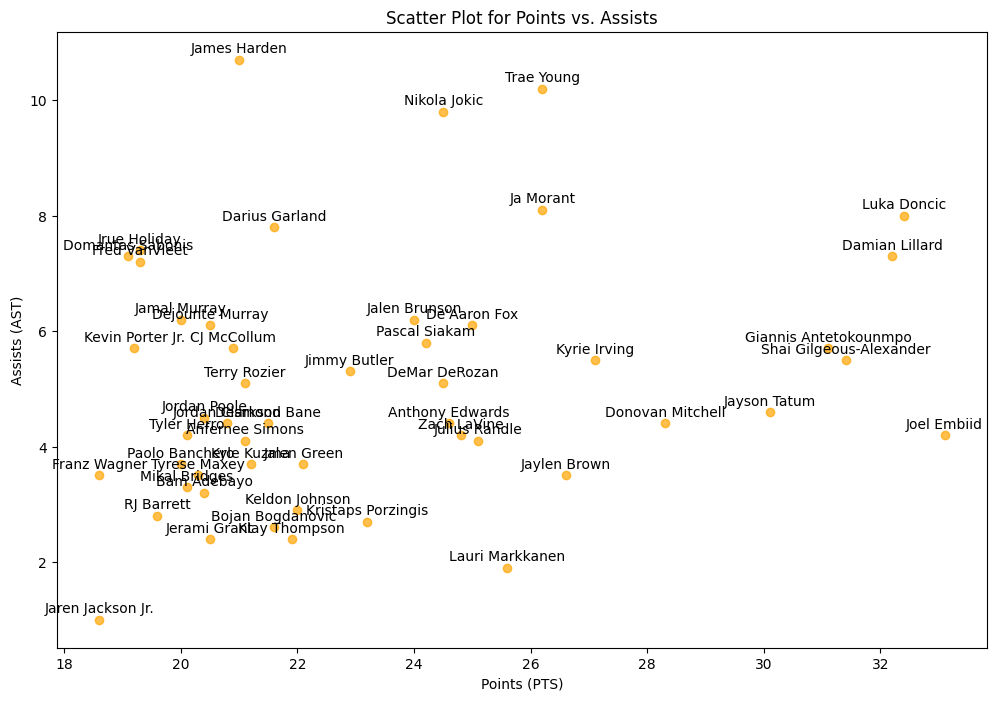

In [31]:
players = df[df['RANK']<=50]['PLAYER']
points = df[df['RANK']<=50]['PTS']
assists = df[df['RANK']<=50]['AST']

plt.figure(figsize=(12, 8))
plt.scatter(points, assists, color='orange', alpha=0.7)

plt.xlabel('Points (PTS)')
plt.ylabel('Assists (AST)')
plt.title('Scatter Plot for Points vs. Assists')

for i, player in enumerate(players):
    plt.annotate(player, (points[i], assists[i]), textcoords="offset points", xytext=(0, 5), ha='center')

We can see that not all of the top players have the same playstyle, some players are more points oriented while others are more about assists.

If **Joel Embiid** is the lead in points but relatively lacks in assists, **James Harden** is the exact opposite of that as he's the one leading in assists.

<font color='Green'>📚 Stacked Bar Chart for Shooting Percentages: </font>

We will compare field goal percentage (FG_PCT), three-point percentage (FG3_PCT), and free throw percentage (FT_PCT) between top players AND bottom players

<ipython-input-37-891ab6ac1cae>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(players_top, rotation=45, ha='right')
<ipython-input-37-891ab6ac1cae>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(players_bottom, rotation=45, ha='right')


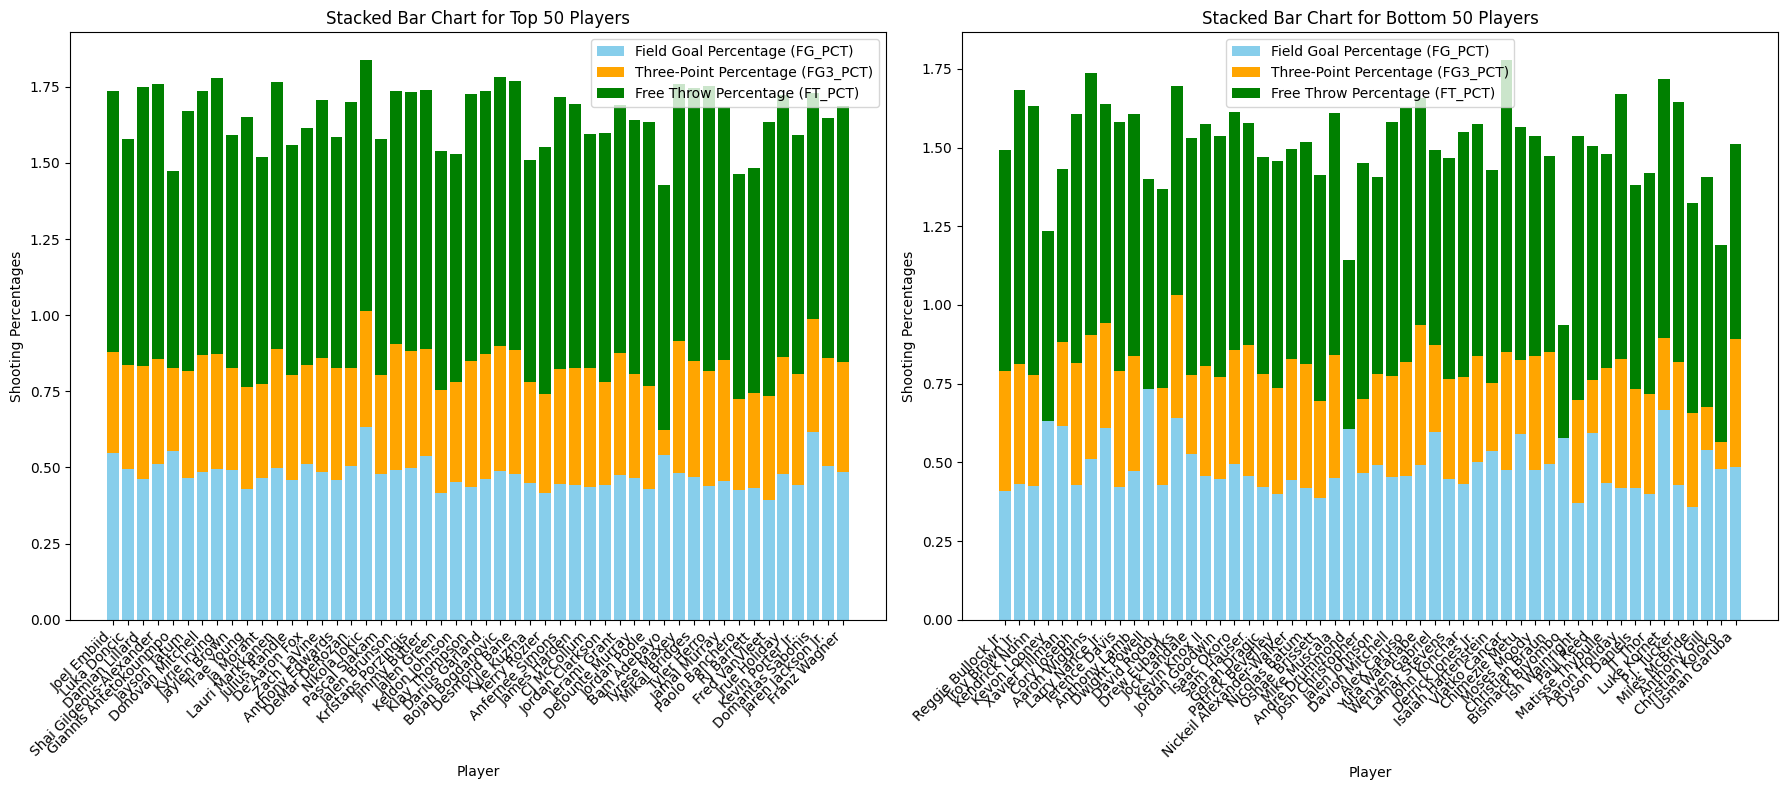

In [37]:
top_players = df[df['RANK'] <= 50]
players_top = top_players['PLAYER']
fg_pct_top = top_players['FG_PCT']
fg3_pct_top = top_players['FG3_PCT']
ft_pct_top = top_players['FT_PCT']

bottom_players = df[df['RANK'] >= 194]
players_bottom = bottom_players['PLAYER']
fg_pct_bottom = bottom_players['FG_PCT']
fg3_pct_bottom = bottom_players['FG3_PCT']
ft_pct_bottom = bottom_players['FT_PCT']

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

axs[0].bar(players_top, fg_pct_top, color='skyblue', label='Field Goal Percentage (FG_PCT)')
axs[0].bar(players_top, fg3_pct_top, bottom=fg_pct_top, color='orange', label='Three-Point Percentage (FG3_PCT)')
axs[0].bar(players_top, ft_pct_top, bottom=(fg_pct_top + fg3_pct_top), color='green', label='Free Throw Percentage (FT_PCT)')
axs[0].set_xticklabels(players_top, rotation=45, ha='right')
axs[0].set_xlabel('Player')
axs[0].set_ylabel('Shooting Percentages')
axs[0].set_title('Stacked Bar Chart for Top 50 Players')
axs[0].legend()

axs[1].bar(players_bottom, fg_pct_bottom, color='skyblue', label='Field Goal Percentage (FG_PCT)')
axs[1].bar(players_bottom, fg3_pct_bottom, bottom=fg_pct_bottom, color='orange', label='Three-Point Percentage (FG3_PCT)')
axs[1].bar(players_bottom, ft_pct_bottom, bottom=(fg_pct_bottom + fg3_pct_bottom), color='green', label='Free Throw Percentage (FT_PCT)')
axs[1].set_xticklabels(players_bottom, rotation=45, ha='right')
axs[1].set_xlabel('Player')
axs[1].set_ylabel('Shooting Percentages')
axs[1].set_title('Stacked Bar Chart for Bottom 50 Players')
axs[1].legend()

plt.tight_layout()
plt.show()

We can notice by comparing the two plots that points alone isn't enough to determine the rank of the players, as most points are fairly close to each other no matter the player's rank.

And now for a UI, we're gonna be using the Tkinter library:

Please note that the code below will only work on an IDE and not on google colab as the latter doesn't allow for a GUI to exist.

In [38]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class NBAStatsVisualizer:
    def __init__(self, root):
        self.root = root
        self.root.title("NBA Stats Visualizer")

        self.frame = ttk.Frame(root, padding="10")
        self.frame.grid(column=0, row=0)

        self.feature_label = ttk.Label(self.frame, text="Select Feature:")
        self.feature_label.grid(column=0, row=0)

        self.selected_feature = tk.StringVar()
        self.feature_dropdown = ttk.Combobox(self.frame, textvariable=self.selected_feature)
        self.feature_dropdown['values'] = list(df.columns)
        self.feature_dropdown.grid(column=1, row=0)

        self.feature2_label = ttk.Label(self.frame, text="Select Feature 2:")
        self.feature2_label.grid(column=2, row=0)

        self.selected_feature2 = tk.StringVar()
        self.feature2_dropdown = ttk.Combobox(self.frame, textvariable=self.selected_feature2)
        self.feature2_dropdown['values'] = list(df.columns)
        self.feature2_dropdown.grid(column=3, row=0)

        self.plot_label = ttk.Label(self.frame, text="Select Plot Type:")
        self.plot_label.grid(column=4, row=0)

        self.selected_plot_type = tk.StringVar()
        self.plot_dropdown = ttk.Combobox(self.frame, textvariable=self.selected_plot_type)
        self.plot_dropdown['values'] = ['Histogram', 'Bar Plot', 'Scatter Plot']
        self.plot_dropdown.grid(column=5, row=0)

        self.plot_button = ttk.Button(self.frame, text="Generate Plot", command=self.generate_plot)
        self.plot_button.grid(column=6, row=0)

        self.figure, self.ax = plt.subplots(figsize=(10, 6))
        self.canvas = FigureCanvasTkAgg(self.figure, master=self.root)
        self.canvas.get_tk_widget().grid(column=0, row=1)

    def generate_plot(self):
        selected_feature = self.selected_feature.get()
        selected_feature2 = self.selected_feature2.get()
        plot_type = self.selected_plot_type.get()

        if (selected_feature or (selected_feature and selected_feature2)) and plot_type:
            self.ax.clear()

            top_50_df = df.head(50)

            if plot_type == 'Histogram':
                self.ax.hist(top_50_df[selected_feature], bins=20, color='skyblue', edgecolor='black')
                self.ax.set_title(f'Histogram of {selected_feature}')
                self.ax.set_xlabel(selected_feature)
                self.ax.set_ylabel('Frequency')

            elif plot_type == 'Bar Plot':
                sns.barplot(x=top_50_df.index, y=top_50_df[selected_feature], color='skyblue', ax=self.ax)
                self.ax.set_title(f'Bar Plot of {selected_feature}')
                self.ax.set_xlabel('Player')
                self.ax.set_ylabel(selected_feature)
                self.ax.set_xticklabels(top_50_df['PLAYER'], rotation=45, ha='right')

            elif plot_type == 'Scatter Plot':
                players = df[df['RANK']<=50]['PLAYER']
                points = df[df['RANK']<=50][selected_feature]
                assists = df[df['RANK']<=50][selected_feature2]

                self.ax.scatter(points, assists, color='orange', alpha=0.7)

                self.ax.set_xlabel(f'{selected_feature}')
                self.ax.set_ylabel(f'{selected_feature2}')
                self.ax.set_title(f'Scatter Plot for {selected_feature} vs. Assists {selected_feature}')
                for i, player in enumerate(players):
                    self.ax.annotate(player, (points[i], assists[i]), textcoords="offset points", xytext=(0, 5), ha='center')

            self.canvas.draw()

root = tk.Tk()
app = NBAStatsVisualizer(root)
root.mainloop()


TclError: no display name and no $DISPLAY environment variable

### <font color='Orange'> PLAYER STATS PREDICTION </font>

We will use points per game (PTS), assists (AST), rebounds (REB), steals (STL), and blocks (BLK) as potential predictors to predict player efficiency (EFF).

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score

In [15]:
features = ['PTS', 'AST', 'REB', 'STL', 'BLK']
target = 'EFF'

data = df[features + [target]]

We're gonna split the data into training set and testing set.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

In this example, we're gonna utilize the linearRegression model.

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

And now we compare the predicted Y with the testing Y.

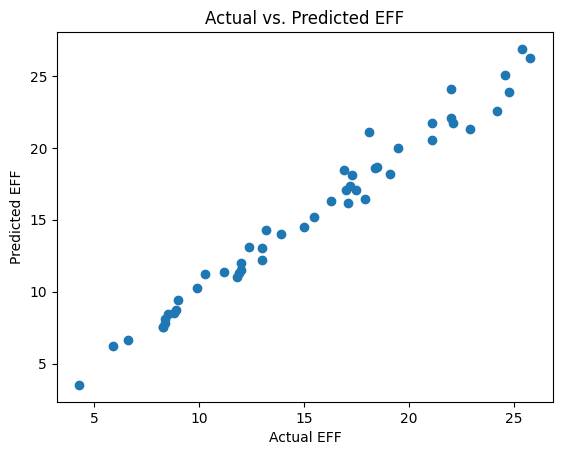

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual EFF')
plt.ylabel('Predicted EFF')
plt.title('Actual vs. Predicted EFF')
plt.show()

### <font color='Orange'> TEAM STATS PREDICTION </font>

We'll be using team statistics like points per game (PTS), field goal percentage (FG_PCT), three-point percentage (FG3_PCT), free throw percentage (FT_PCT), and assists per game (AST).

These are common performance metrics that might influence a team's win percentage.

In [19]:
features = ['PTS', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'AST']
target = 'W_PCT'

data2 = df2[features + [target]]

X_train, X_test, y_train, y_test = train_test_split(data2[features], data2[target], test_size=0.2, random_state=42)

model_team = LinearRegression()

In [20]:
model_team.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model_team.predict(X_test)

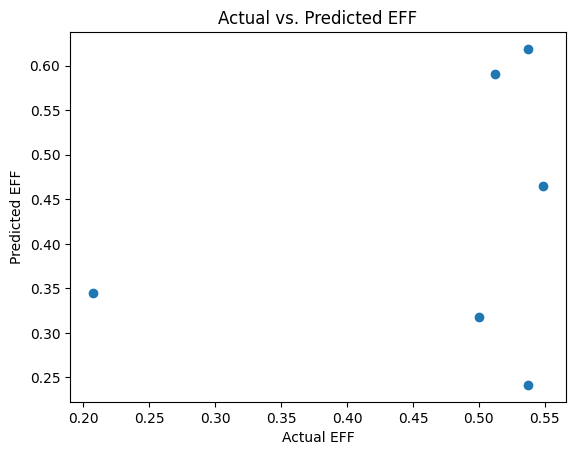

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual EFF')
plt.ylabel('Predicted EFF')
plt.title('Actual vs. Predicted EFF')
plt.show()

We notice that the predicted EFF is way off from the actual EFF.

This issue is either from the lack of observations for training, or that the used model is not adequate for this example.